In [15]:
import matplotlib.pyplot as plt

Extract time and latency from file

In [16]:
records = []
pkt =[]
with open('test.txt') as f:
    records = f.readlines()
f.close()

count_over120 = 0
count_loss = 0
for record in records:
    r = record.split()
    time = int(r[0])+ int(r[1])/1000000
    time = round(time,1)
    latency = round(float(r[2]),2)
    if(latency>120):
        count_over120+=1
        count_loss+=1
    elif latency>65:
        count_loss+=1
        pkt.append((time,latency))
    else:
        pkt.append((time,latency))

Draw Time - Latency (Only focus on the first two minutes)

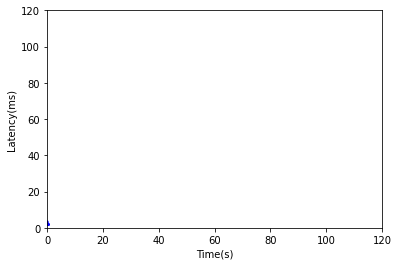

In [30]:
firstpktT = pkt[0][0]
redplotx =[]
redploty =[]
blueplotx =[]
blueploty =[]
for p in pkt:
    timeval = p[0] - firstpktT
    if( timeval<=120):
        if((p[1]<65) and (p[1]!=0)):
            blueplotx.append(timeval)
            blueploty.append(p[1])
        else:
            redplotx.append(timeval)  
            redploty.append(p[1])   
plt.plot(redplotx, redploty, color='red', marker='D', linestyle='None', markersize=1)
plt.plot(blueplotx, blueploty, color='blue', marker='D',linestyle = 'None', markersize=1)
plt.axis([0, 120, 0, 120])
plt.xlabel('Time(s)')
plt.ylabel('Latency(ms)')
plt.show()  

In [31]:
print("%d lost or late packets, %d packets with latency over 120ms not shown."%(count_loss,count_over120))

0 lost or late packets, 0 packets with latency over 120ms not shown.
